<h1 style="color:#b57c01;">[Pie Chart] 財政部出口統計</h1>

In [98]:
#pip install --upgrade nbformat


In [99]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt

from dotenv import load_dotenv

plt.rcParams["font.family"] = 'WenQuanYi Zen Hei'

input_file ="mof_export_statistic.csv"


load_dotenv()


data_path = os.environ.get("PROCESSED_DATA_DIR")

fPath = os.path.join ( data_path, input_file ) 
df = pd.read_csv ( fPath )
df= df.fillna(0)


In [100]:
# Mapping logic: Main categories get dark colors, sub-categories (1) get lighter ones
color_map = {
    '1.活動物；動物產品': "#5995c0", '2.植物產品': '#aec7e8', '3.動植物油脂': '#ff7f0e',
    '4.調製食品；飲料及菸酒': '#ffbb78', '5.礦產品': "#634608", '6.化學品': "#f02e14",
    '7.塑膠、橡膠及其製品': "#e45d0f", '8.毛皮及其製品': "#a0631d", '9.木及木製品': "#61af19",
    '10.紙漿；紙及其製品；印刷品': '#c5b0d5', '11.紡織品': "#6e2777", '12.鞋、帽及其他飾品': "#5c3a7c",
    '13.非金屬礦物製品': '#e377c2', '14.珠寶及貴金屬製品': '#f7b6d2', '15.基本金屬及其製品': '#7f7f7f',
    '16.機械及電機設備': "#0b75cc", '17.運輸工具': '#bcbd22', '18.光學及精密儀器；鐘錶；樂器': '#dbdb8d',
    '19.其他': '#17becf'
}
default_color = '#BDC3C7'

In [101]:
cols_name = df.columns
cols_name

Index(['國家/地區別', '總計', '1.活動物；動物產品', '(1)水產品', '2.植物產品', '(1)食用蔬菜',
       '(2)食用果實及堅果', '3.動植物油脂', '4.調製食品；飲料及菸酒', '(1)調製食品', '(2)飲料、酒類及醋',
       '(3)菸及菸葉代用品', '5.礦產品', '(1)石油煉製品', '6.化學品', '(1)有機化學品', '7.塑膠、橡膠及其製品',
       '(1)塑膠原料', '(2)塑膠製品', '(3)橡膠及其製品', '8.毛皮及其製品', '9.木及木製品',
       '10.紙漿；紙及其製品；印刷品', '11.紡織品', '(1)紗布', '12.鞋、帽及其他飾品', '13.非金屬礦物製品',
       '14.珠寶及貴金屬製品', '15.基本金屬及其製品', '(1)鋼鐵及其製品', '(2)其他基本金屬及其製品',
       '16.機械及電機設備', '(1)電子零組件', '(2)機械', '(3)電機產品', '(4)資通與視聽產品', '(5)家用電器',
       '17.運輸工具', '18.光學及精密儀器；鐘錶；樂器', '(1)光學及精密儀器', '19.其他', '(1)家具',
       '(2)玩具與運動用品', '月', '年'],
      dtype='object')

In [102]:
CLstr = "國家/地區別"

df[CLstr].unique()

array(['亞洲', '中國大陸', '香港', '日本', '南韓', '新南向18國(註1)', '東協10國', '泰國',
       '馬來西亞', '印尼', '菲律賓', '新加坡', '越南', '汶萊', '緬甸', '柬埔寨', '寮國', '南亞',
       '印度', '巴基斯坦', '孟加拉', '斯里蘭卡', '尼泊爾', '不丹', '哈薩克', '中東', '伊朗', '伊拉克',
       '以色列', '科威特', '阿曼', '卡達', '沙烏地阿拉伯', '土耳其', '阿拉伯聯合大公國', '北美洲', '美國',
       '加拿大', '中美洲', '墨西哥', '南美洲', '巴西', '智利', '秘魯', '歐洲', '德國', '法國',
       '荷蘭', '英國', '俄羅斯', '奧地利', '比利時', '匈牙利', '義大利', '波蘭', '西班牙', '瑞典',
       '瑞士', '烏克蘭', '歐盟(註2)', '東歐', '非洲', '阿爾及利亞', '安哥拉', '埃及', '南非',
       '肯亞', '奈及利亞', '大洋洲', '澳大利亞', '巴布亞紐幾內亞', '紐西蘭'], dtype=object)

In [103]:
#import plotly.io as 機械及電機設備pio
#pio.renderers.default = "browser" # 設定渲染器為瀏覽器
# 
# Settings
topN = 10
CLstr = "國家/地區別"
colName = "16.機械及電機設備"  #"總計" #

fig_title=f"年度國家財政部出口統計 {colName} Top {topN}"


df = df[~df[ CLstr ].isin( ["北美洲","亞洲", "新南向18國(註1)", "東協10國", "中美洲" , "歐盟(註2)"] ) ]


### bar chart animation ###

In [104]:
# Aggregate by year per country
df_yearly = df.groupby(['年', CLstr], as_index=False)[colName].sum()

#Rank Top N per year
df_yearly['rank'] = df_yearly.groupby('年')[colName].rank(method='first', ascending=False)
df_topN = df_yearly[df_yearly['rank'] <= topN].copy()

#Sort for plotting
df_topN = df_topN.sort_values(['年', colName], ascending=[True, False])
df_topN["年"] = df_topN["年"].astype(str)  # make sure frame names are string

#Create figure
fig = px.bar(
    df_topN,
    x=colName,
    y=CLstr,
    color=CLstr,
    orientation='h',
    animation_frame="年",
    animation_group=CLstr,
    title= fig_title,

    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=900,
    height=600,
    range_x=[0, df_topN[colName].max() * 1.1],  # dynamic x-axis max
)

#Update each frame for dynamic y-axis ordering and text labels
for frame in fig.frames:
    year_data = df_topN[df_topN["年"] == frame.name].sort_values(colName, ascending=True)
    
    # Update y-axis order
    frame.layout.yaxis = dict(
        categoryorder="array",
        categoryarray=year_data[CLstr].tolist()#,
        #autorange='reversed'  # top bar at top
    )
    
    
#Layout
fig.update_layout(
    title= fig_title,
    xaxis_title=colName,
    yaxis_title=CLstr,
)

fig.update_layout(
    yaxis=dict(
        categoryorder="array",
        categoryarray=[]#,
        #autorange='reversed'  # <-- this flips the bars so top bar is at top
    )
)

#Slow down animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2500  # 2.5 sec per frame

#Show figure
fig.show()




In [105]:
df_topN[df_topN["年"] == 114].sort_values(colName, ascending=False)

,年,國家/地區別,16.機械及電機設備,rank


In [106]:
df_topN[ [ CLstr , "年" , colName , "rank" ] ]
df_topN.head(120)

,年,國家/地區別,16.機械及電機設備,rank
1,104,中國大陸,35930401,1.0
64,104,香港,28555523,2.0
52,104,美國,16597061,3.0
37,104,歐洲,13301840,4.0
32,104,新加坡,13262410,5.0
...,...,...,...,...
697,114,歐洲,26931123,6.0
672,114,南韓,22251710,7.0
679,114,墨西哥,20590889,8.0
693,114,日本,20051816,9.0


In [107]:
df_selected = df[ df[CLstr]=="日本" ]
df_selected = df.groupby(['年', CLstr], as_index=False)[colName].sum()

df_selected [ [ CLstr, "年" , colName ] ]

,國家/地區別,年,16.機械及電機設備
0,不丹,104,30
1,中國大陸,104,35930401
2,中東,104,2383841
3,以色列,104,297580
4,伊拉克,104,17014
...,...,...,...
721,阿曼,114,14347
722,阿爾及利亞,114,31256
723,非洲,114,576370
724,香港,114,65250305


### set color for matplotlib ###


In [108]:
# Function to convert "rgb(r, g, b)" to hex
def rgb_to_hex(rgb):
    r, g, b = map(int, rgb[4:-1].split(','))
    return f"#{r:02x}{g:02x}{b:02x}"

# Get countries
countries = df_topN[CLstr].unique()

# Get Plotly Pastel colors
pastel_colors = px.colors.qualitative.Pastel

# Convert any "rgb(...)" to hex
pastel_colors_hex = [rgb_to_hex(c) if c.startswith("rgb") else c for c in pastel_colors]

# Assign colors to countries, cycling if needed
import itertools
color_cycle = itertools.cycle(pastel_colors_hex)
country_colors = {country: next(color_cycle) for country in countries}

### bar chart ###

{'中國大陸': '#66c5cc', '香港': '#f6cf71', '美國': '#f89c74', '歐洲': '#dcb0f2', '新加坡': '#87c55f', '日本': '#9eb9f3', '南韓': '#fe88b1', '馬來西亞': '#c9db74', '德國': '#8be0a4', '菲律賓': '#b497e7', '荷蘭': '#b3b3b3', '越南': '#66c5cc', '泰國': '#f6cf71', '墨西哥': '#f89c74'}
       年 國家/地區別  16.機械及電機設備  rank
712  114     美國   174563912   1.0
661  114   中國大陸    76758893   2.0
724  114     香港    65250305   3.0
692  114    新加坡    35680551   4.0
725  114   馬來西亞    34253402   5.0
697  114     歐洲    26931123   6.0
672  114     南韓    22251710   7.0
679  114    墨西哥    20590889   8.0
693  114     日本    20051816   9.0
719  114     越南    10398177  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_114_bar_chart.svg


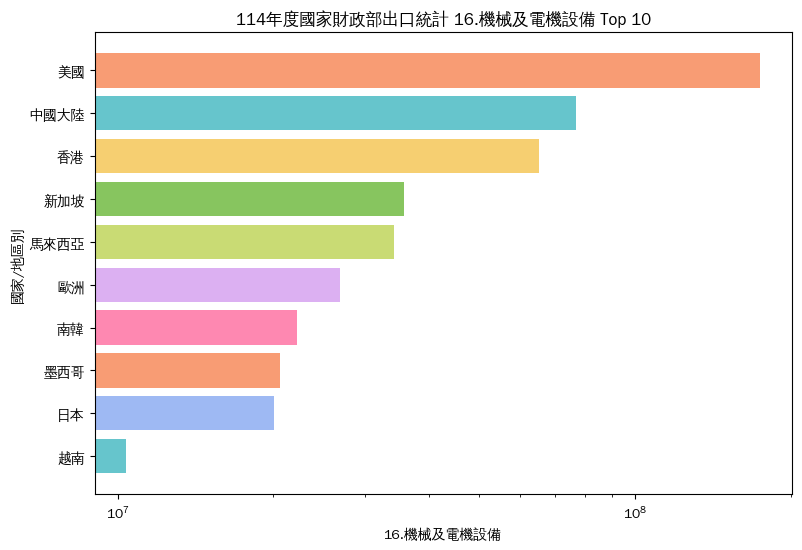

       年 國家/地區別  16.機械及電機設備  rank
646  113     美國    87977442   1.0
595  113   中國大陸    72791261   2.0
658  113     香港    48697662   3.0
626  113    新加坡    29382303   4.0
631  113     歐洲    23156339   5.0
606  113     南韓    16377004   6.0
627  113     日本    16321068   7.0
659  113   馬來西亞    16013120   8.0
637  113     泰國     8850430   9.0
650  113     荷蘭     6913093  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_113_bar_chart.svg


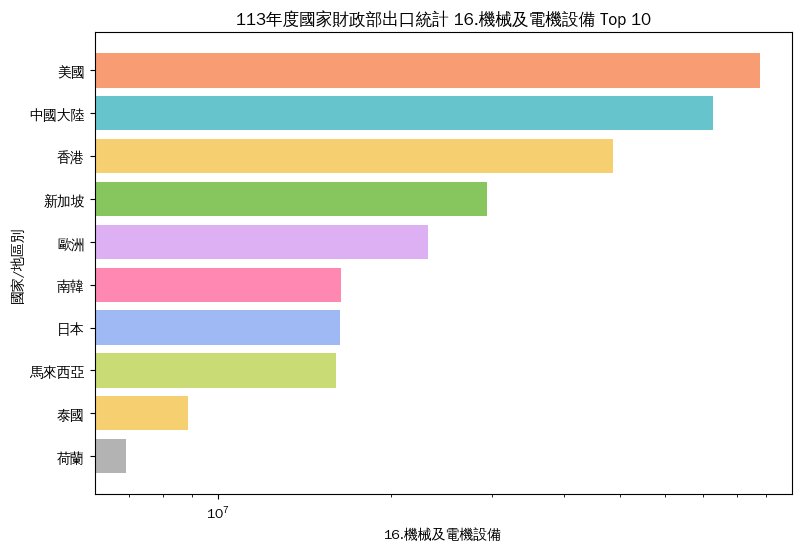

       年 國家/地區別  16.機械及電機設備  rank
529  112   中國大陸    69040192   1.0
580  112     美國    52418686   2.0
592  112     香港    51143458   3.0
565  112     歐洲    25655164   4.0
560  112    新加坡    24916832   5.0
561  112     日本    21570315   6.0
540  112     南韓    14154554   7.0
593  112   馬來西亞    11254637   8.0
584  112     荷蘭     9833415   9.0
571  112     泰國     7857411  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_112_bar_chart.svg


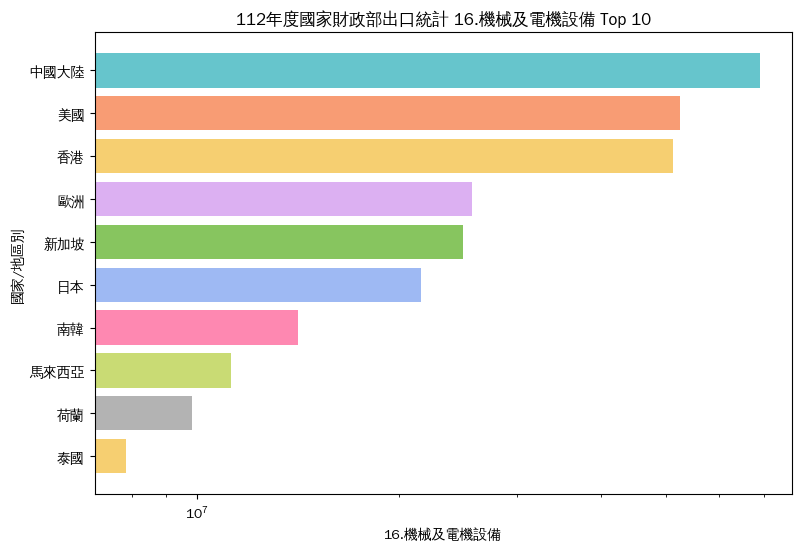

       年 國家/地區別  16.機械及電機設備  rank
463  111   中國大陸    84769315   1.0
526  111     香港    58403959   2.0
514  111     美國    44587629   3.0
494  111    新加坡    24103849   4.0
495  111     日本    21897313   5.0
499  111     歐洲    20185416   6.0
474  111     南韓    17320421   7.0
527  111   馬來西亞    12207075   8.0
521  111     越南     5043136   9.0
492  111     德國     4800939  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_111_bar_chart.svg


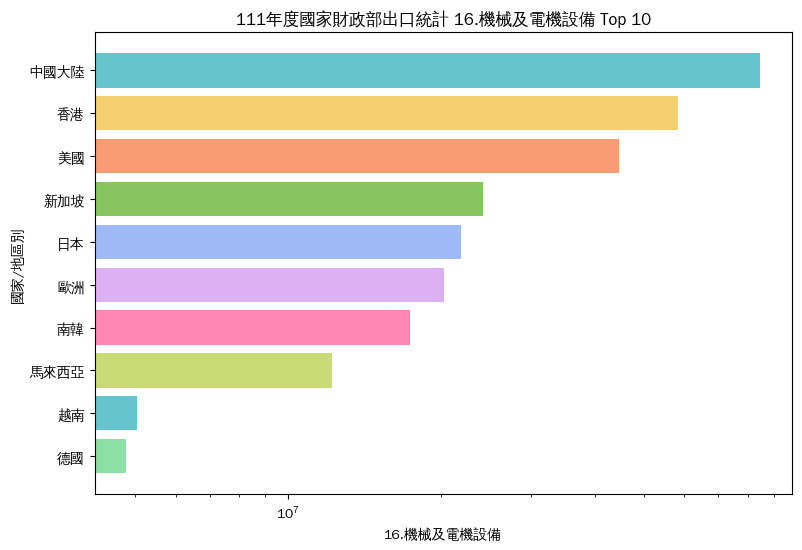

       年 國家/地區別  16.機械及電機設備  rank
397  110   中國大陸    81514690   1.0
460  110     香港    54652195   2.0
448  110     美國    36810792   3.0
428  110    新加坡    21563455   4.0
433  110     歐洲    18455595   5.0
429  110     日本    18086507   6.0
408  110     南韓    14666600   7.0
461  110   馬來西亞     8224673   8.0
452  110     荷蘭     4547464   9.0
455  110     越南     4349144  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_110_bar_chart.svg


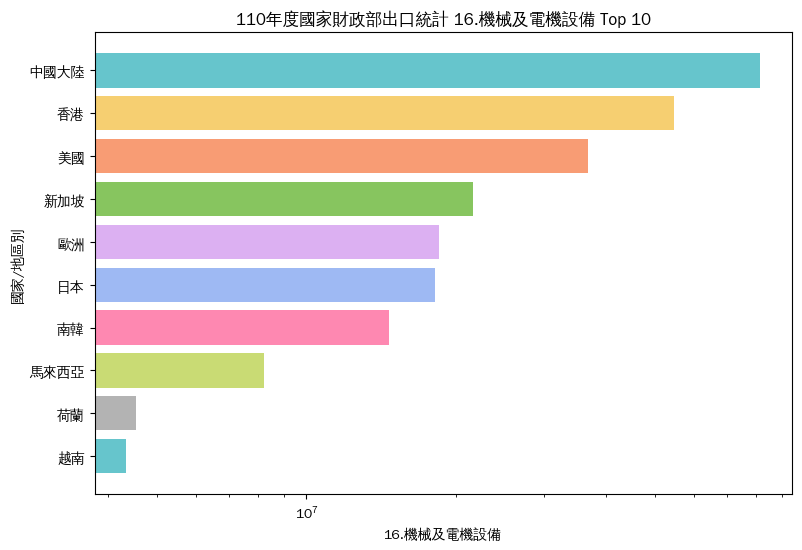

       年 國家/地區別  16.機械及電機設備  rank
331  109   中國大陸    67462346   1.0
394  109     香港    40756361   2.0
382  109     美國    29258283   3.0
362  109    新加坡    16671903   4.0
367  109     歐洲    14664188   5.0
363  109     日本    14503578   6.0
342  109     南韓    10948263   7.0
395  109   馬來西亞     6479470   8.0
386  109     荷蘭     3552801   9.0
387  109    菲律賓     3379650  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_109_bar_chart.svg


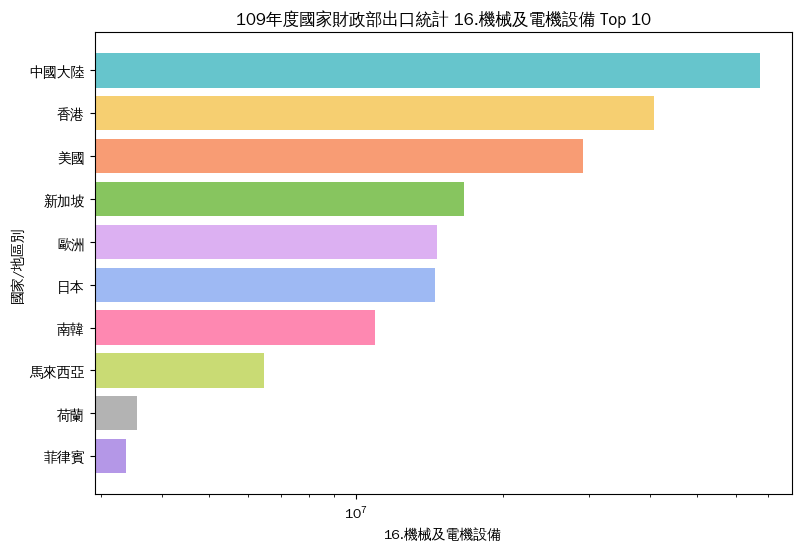

       年 國家/地區別  16.機械及電機設備  rank
265  108   中國大陸    55430998   1.0
328  108     香港    33525445   2.0
316  108     美國    25691168   3.0
301  108     歐洲    15144768   4.0
296  108    新加坡    14739941   5.0
297  108     日本    13310784   6.0
276  108     南韓     9252651   7.0
329  108   馬來西亞     6120466   8.0
294  108     德國     3687625   9.0
320  108     荷蘭     3407565  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_108_bar_chart.svg


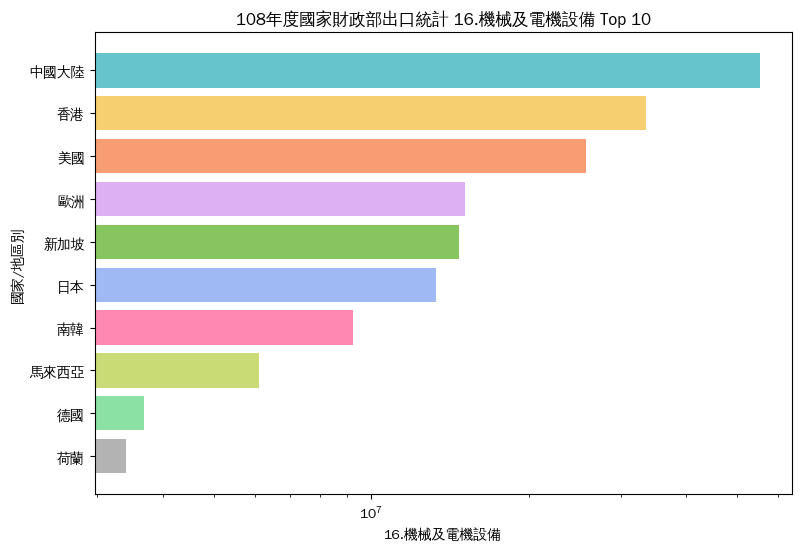

       年 國家/地區別  16.機械及電機設備  rank
199  107   中國大陸    55094724   1.0
262  107     香港    33489282   2.0
250  107     美國    19548403   3.0
235  107     歐洲    15573727   4.0
230  107    新加坡    13419771   5.0
231  107     日本    12168514   6.0
210  107     南韓     8962653   7.0
263  107   馬來西亞     7017223   8.0
228  107     德國     4039525   9.0
255  107    菲律賓     3634604  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_107_bar_chart.svg


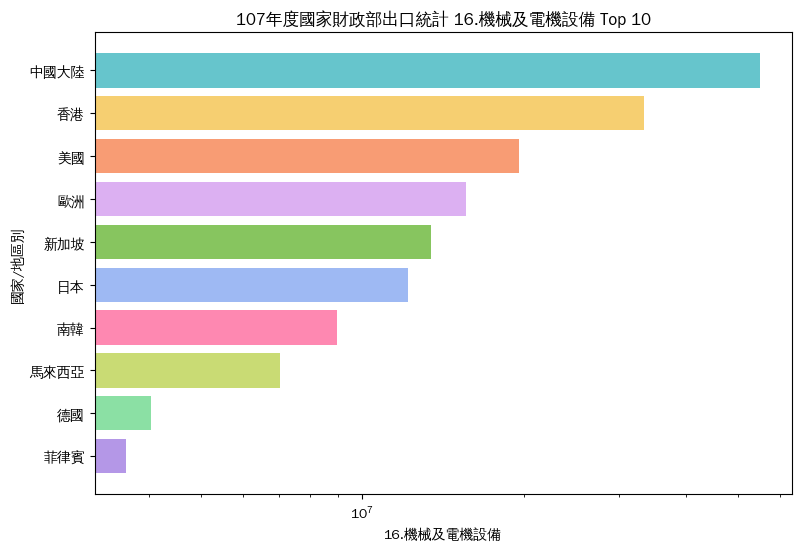

       年 國家/地區別  16.機械及電機設備  rank
133  106   中國大陸    49845874   1.0
196  106     香港    32876081   2.0
184  106     美國    18319318   3.0
169  106     歐洲    14521442   4.0
164  106    新加坡    14355282   5.0
165  106     日本    11430319   6.0
144  106     南韓     9423484   7.0
197  106   馬來西亞     6889207   8.0
162  106     德國     3682967   9.0
189  106    菲律賓     3604886  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_106_bar_chart.svg


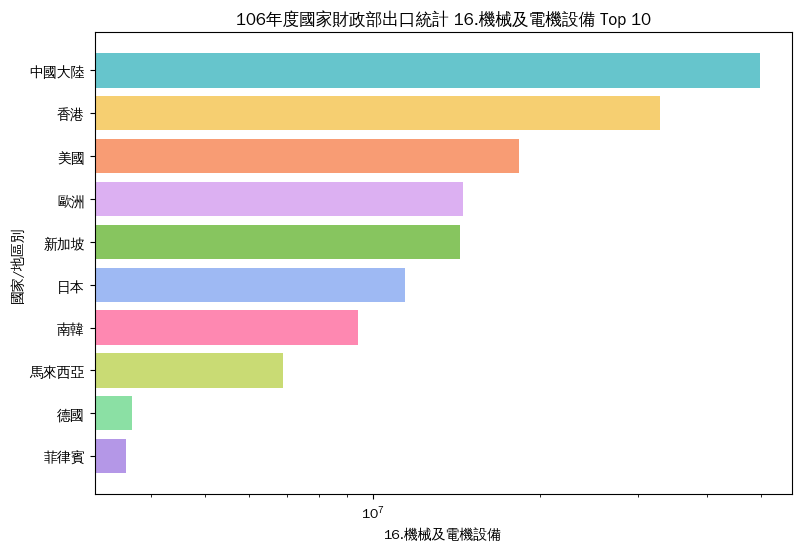

       年 國家/地區別  16.機械及電機設備  rank
67   105   中國大陸    39502788   1.0
130  105     香港    30456582   2.0
118  105     美國    16420638   3.0
103  105     歐洲    13205550   4.0
98   105    新加坡    12494583   5.0
99   105     日本    11148517   6.0
78   105     南韓     8623598   7.0
131  105   馬來西亞     4899804   8.0
96   105     德國     3341103   9.0
123  105    菲律賓     3039592  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_105_bar_chart.svg


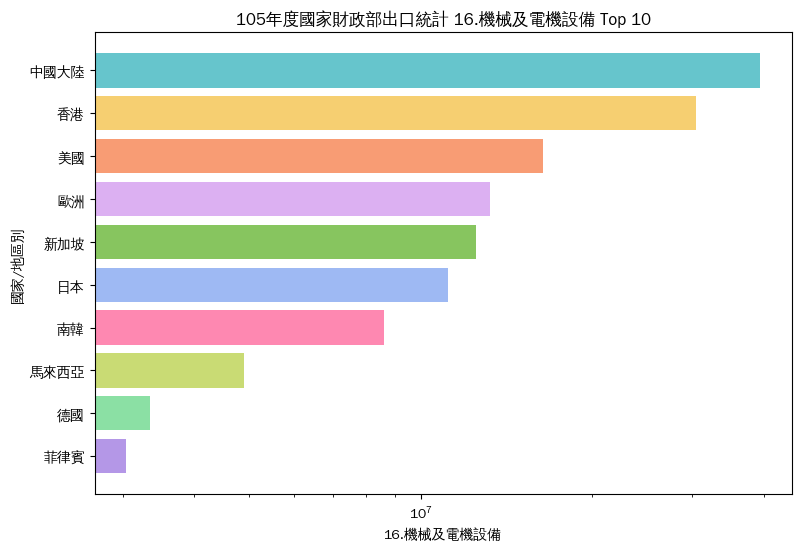

      年 國家/地區別  16.機械及電機設備  rank
1   104   中國大陸    35930401   1.0
64  104     香港    28555523   2.0
52  104     美國    16597061   3.0
37  104     歐洲    13301840   4.0
32  104    新加坡    13262410   5.0
33  104     日本    11099827   6.0
12  104     南韓     9439709   7.0
65  104   馬來西亞     3880803   8.0
30  104     德國     3446504   9.0
57  104    菲律賓     3071818  10.0
Saved chart to bar_chart_animation_output/16.機械及電機設備_104_bar_chart.svg


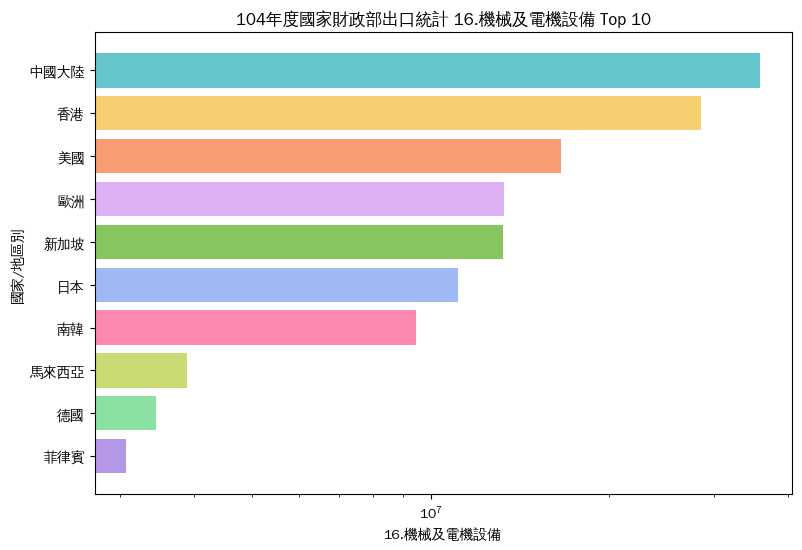

In [109]:
import itertools

def save_fig( year , folder="bar_chart_animation_output", filename_prefix=f'{colName}', ext='svg' ):
    if not os.path.exists(folder):
        os.makedirs(folder)
    filepath = os.path.join(folder, f"{filename_prefix}_{year}.{ext}")
    plt.savefig(filepath, format=ext, bbox_inches='tight')
    print(f"Saved chart to {filepath}")

# Formatter for "M" units
def millions_formatter(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.0f}M" if x >= 1e7 else f"{x/1e6:.1f}M"
    else:
        return f"{x/1e6:.2f}M"

print(country_colors)

def pltBrChart(df, year):

    plt.figure(figsize=(9, 6))
    
    y = df[colName]
    x = df[CLstr]
    
    # Use the pre-defined color for each country
    colors = [country_colors[c] for c in x]
    plt.barh(x, y, color=colors)
    
    plt.gca().invert_yaxis()
    plt.xscale('log')
    
    plt.title( f"{year}{fig_title}" )
    plt.xlabel( colName )
    plt.ylabel( CLstr )
    save_fig( f'{year}_bar_chart' )

    plt.show()



# Plot for multiple years
for year in range(114, 103, -1):
    year_str = str(year)  # convert int to string
    df_year = df_topN[df_topN['年'] == year_str]
    print( df_year )
    if not df_year.empty:
        pltBrChart(df_year, year_str)
    else:
        print(f"No data for year {year_str}")




In [110]:
columns_to_keep = [
    '1.活動物；動物產品', '2.植物產品', '3.動植物油脂', '4.調製食品；飲料及菸酒', '5.礦產品',
    '8.毛皮及其製品', '9.木及木製品', '10.紙漿；紙及其製品；印刷品', '11.紡織品', 
    '12.鞋、帽及其他飾品', '13.非金屬礦物製品', '14.珠寶及貴金屬製品', '15.基本金屬及其製品', 
    '16.機械及電機設備', '17.運輸工具', 
    '18.光學及精密儀器；鐘錶；樂器', '19.其他', '月', '年'
]


In [111]:
Nation="美國"
year = 114 


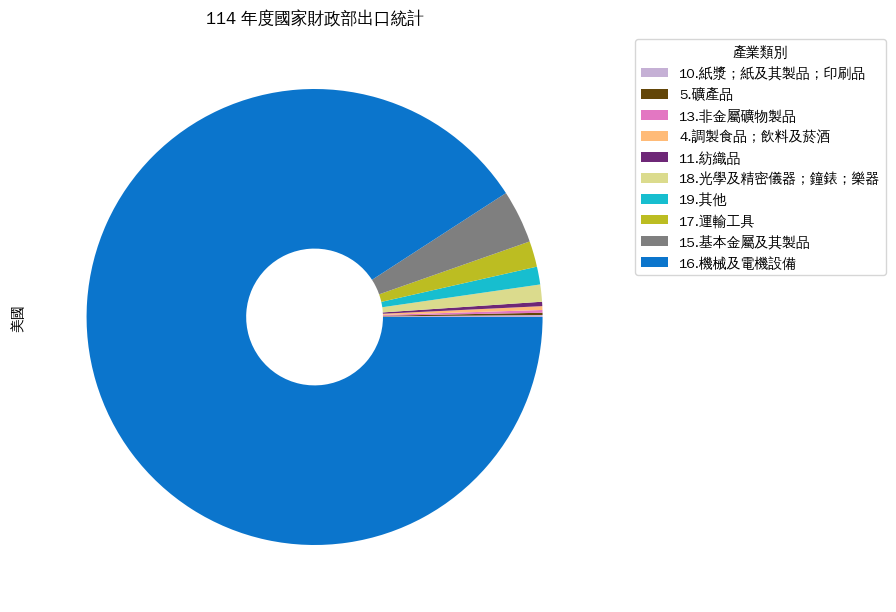

In [112]:
df_USA = df [ df[CLstr] == Nation ].copy()
df_USA = df_USA[columns_to_keep]

plt.figure(figsize=(9, 6))
    
df_USA["年"] = df_USA["年"].astype(int)
df_USA_yearly = df_USA [ df_USA["年"] == year ]

cols_to_drop = [CLstr, "年", "月"]
cols_to_drop = [col for col in cols_to_drop if col in df_USA_yearly.columns]

export_cols = df_USA_yearly.columns.drop(cols_to_drop)

export_values = df_USA_yearly[export_cols].sum() 
export_values = export_values.nlargest(10)
export_values = export_values.sort_values()

plt.pie( export_values,
         labels=None,
         colors=[color_map.get(x, default_color ) for x in export_values.index ],
         #autopct="%1.1f%%"
         wedgeprops={'width': 0.7}
         )

# (1.05, 1) means: 5% to the right of the plot, and aligned with the top
plt.legend(export_values.index, 
           title="產業類別", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# IMPORTANT: Use this to prevent the legend from being cut off
plt.tight_layout()
    
plt.title( f"{year} 年度國家財政部出口統計" )
plt.ylabel( Nation )


plt.show()